<a href="https://colab.research.google.com/github/shreyassarda7/Alpha_Research/blob/main/Harami_BullishEngulfing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: Predict the price of ETH using ML Model

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
import math
import random
plt.style.use('fivethirtyeight')

In [3]:
# Define Bullish Harami Pattern Test
def bullish_harami(yest_o, yest_c, tod_o, tod_c):
  if yest_o > yest_c and tod_o < tod_c and yest_o > tod_c and yest_c < tod_o:
    return True
  else:
    return False

In [4]:
# Define Bearish Engulfing Candle Test
def bearish_engulfing(yest_o, yest_c, tod_o, tod_c):
  if yest_o > yest_c and tod_o < tod_c and tod_o < yest_c and tod_c > 0.5*(yest_o + yest_c):
    return True
  else:
    return False

In [5]:
# Import Data
def check_return(stock, num_days):
  start_date = (datetime.datetime.now() - datetime.timedelta(days = num_days)).strftime("%m-%d-%Y")
  df = web.DataReader(stock, data_source = 'yahoo', start = start_date)
  df.dropna(how = 'any', inplace = True)
  df['tod_o'] = df['Open']
  df['tod_c'] = df['Close']
  df['yest_o'] = df['Open'].shift(1)
  df['yest_c'] = df['Close'].shift(1)

  # Add ATR 20 Value to df
  df['max_diff'] = pd.Series()
  df['h_l'] = df['High'] - df['Low']
  df['h_c'] = (df['High'] - df['Close']).abs()
  df['l_c'] = (df['Low'] - df['Close']).abs()
  df['max_diff'] = df[['h_l', 'h_c', 'l_c']].max(axis = 1)
  df['ATR20'] = df['max_diff'].rolling(window = 20).mean()
  df['ATR20'] = df['ATR20'].shift(1)
  df = df.iloc[20:,[0, 1, 6, 7, 8, 9, 14]]

  df['buy'] = pd.Series()
  df['sell'] = pd.Series()
  df['funds'] = np.nan

  last_pos = 0
  buy_pos = 0
  last_funds = 100000.0

  harami_flag = False
  bear_engulf_flag = False
  stop_loss = np.nan
  target_price = np.nan
  pos_hit = 0.0
  neg_hit = 0.0

  for index, row in df.iterrows():
    if (harami_flag or bear_engulf_flag) and last_pos == 0:
      row['buy'] = row['tod_o']
      row['sell'] = np.nan
      row['funds'] = last_funds
      last_pos = int(last_funds / row['tod_o'])
      target_price = row['tod_o'] + 3 * row['ATR20']
      stop_loss = row['tod_o'] - 3 * row['ATR20']
    elif last_pos > 0 and row['yest_c'] > target_price:
      row['buy'] = np.nan
      row['sell'] = row['tod_o']
      last_funds = last_pos * row['tod_o']
      row['funds'] = last_funds
      last_pos = 0
      pos_hit += 1
    elif last_pos > 0 and row['yest_c'] < stop_loss:
      row['buy'] = np.nan
      row['sell'] = row['tod_o']
      last_funds = last_pos * row['tod_o']
      row['funds'] = last_funds
      last_pos = 0
      neg_hit += 1
    elif last_pos > 0:
      row['buy'] = np.nan
      row['sell'] = np.nan
      last_funds = last_pos * row['tod_c']
      row['funds'] = last_funds
    else:
      row['buy'] = np.nan
      row['sell'] = np.nan
      row['funds'] = last_funds

    harami_flag = bullish_harami(row['yest_o'],	row['yest_c'], row['tod_o'],	row['tod_c'])
    bear_engulf_flag = bearish_engulfing(row['yest_o'],	row['yest_c'], row['tod_o'],	row['tod_c'])
  
  # hit_rate of strategy i.e. (no. of time Target Price reached) / (no. of times Stop Loss reached)
  hit_rate = (pos_hit/(pos_hit + neg_hit))
  # annual return on investment in percent rounded to 2 decimals
  roi = round(((df['funds'][-1] * 0.00001) ** (365.25 / num_days) - 1) * 100, 2)
  
  # Plot buy-sell signals with stock price and save a .png file
  plt.figure(figsize = (15, 7))
  plt.plot(df['tod_c'], label = stock, linewidth = 0.7)
  plt.plot(df['buy'], marker = '^')
  plt.plot(df['sell'], marker = 'v')
  plt.title('Buy-Sell signals for ' + str(stock[:-3]))
  plt.xlabel('Last 1 year buy-sell signals')
  plt.ylabel('Price(in ₹)')
  plt.legend(loc = 'upper left')

  # Plot live funds data and save .png file
  plt.figure(figsize = (15, 7))
  plt.plot(df['funds'], label = stock, lw = 0.7)
  plt.title('Live funds for ' + str(stock[:-3]))
  plt.xlabel('Date')
  plt.ylabel('Live funds')
  plt.legend(loc = 'upper left')

  return str(stock[:-3]) + '(Hit rate: ' + str(hit_rate) + '; Annual Return on Investment: ' + str(roi) + '.'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


BIRLACORPN(Hit rate: 1.0; Annual Return on Investment: 88.12.


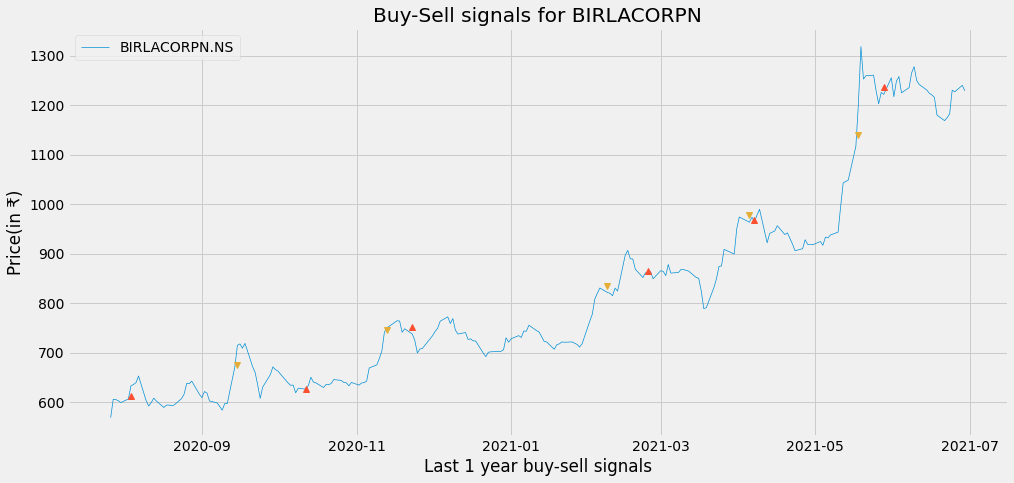

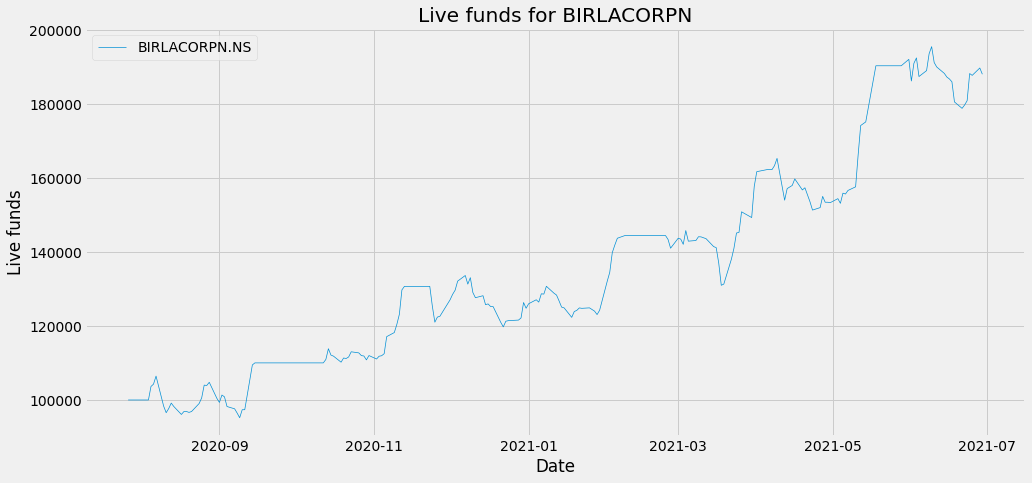

In [6]:
# Do calculations and download images for each stock in our nifty database

print(check_return('BIRLACORPN.NS', 365))